In [1]:
import pyedflib
import numpy as np
import matplotlib.pyplot as plt
import fourier_lib as fourier

In [2]:
# file_name = pyedflib.data.get_generator_filename()

f = pyedflib.EdfReader("abdominal-and-direct-fetal-ecg-database-1.0.0\er01.edf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)

In [3]:
sigbufs.shape

(5, 300000)

In [4]:
Fs_signal = sigbufs.shape[1]

In [33]:
# n_time = sigbufs.shape[1]
n_time = Fs_signal
X_test = np.linspace(0,300,num=n_time)

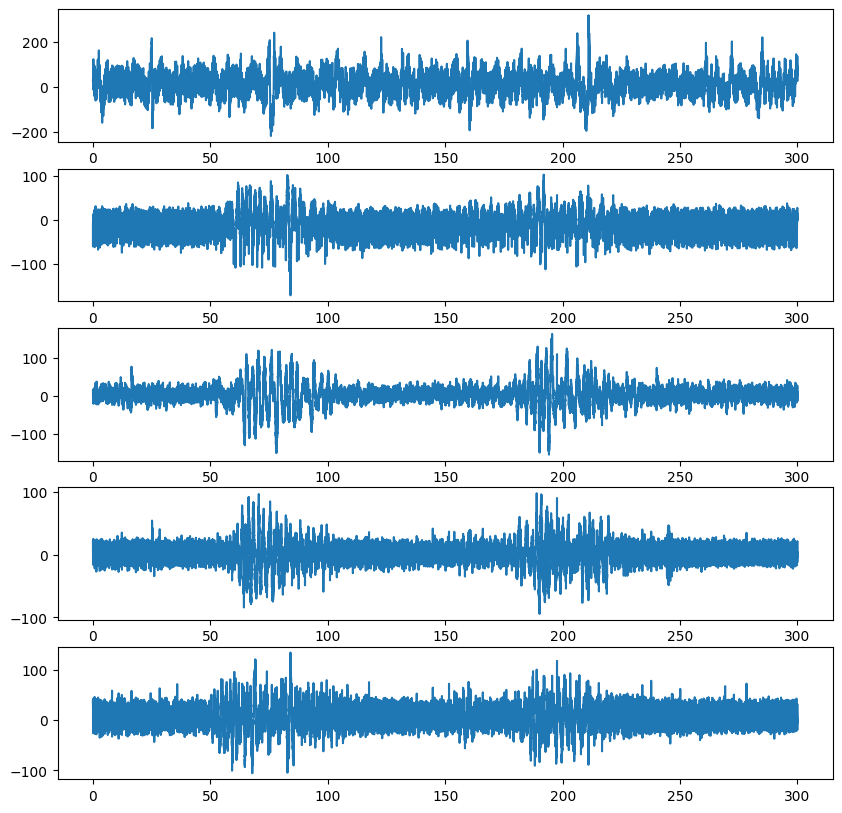

In [79]:
plt.figure(figsize=(10,10))

for i in range(5):
    plt.subplot(5,1,i+1)
    plt.plot(X_test[:], sigbufs[i,:])

In [69]:
# total samples: 300000
Fs = 1000
T = 1
X = np.linspace(0,300,num=Fs*300)
N_freq = np.array(range(300))
F_domain = N_freq/T

In [70]:
channel_1 = sigbufs[0,:]

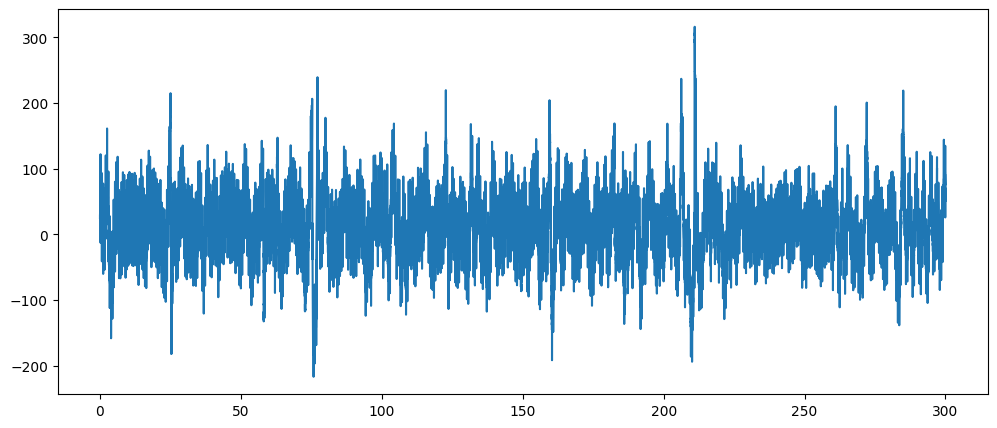

In [71]:
plt.figure(figsize=(12,5))
# plt.plot(X[80000:120000], channel_1[80000:120000])
plt.plot(X,channel_1)

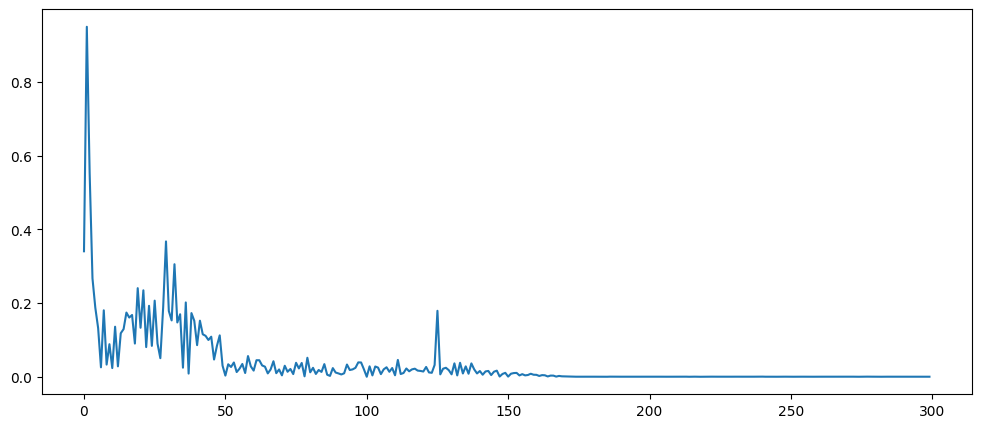

In [85]:
channel_1_FT = fourier.fourier_series_spectrum(X, channel_1, N_freq, 0.5)

plt.figure(figsize=(12,5))
plt.plot(F_domain, channel_1_FT)

In [73]:
channel_1_TF = fourier.time_frequency_domain(X, channel_1, N_freq, T/2)

In [74]:
channel_1_TF[:,:1000].shape

(300, 1000)

Text(0.5, 0, 'Time')

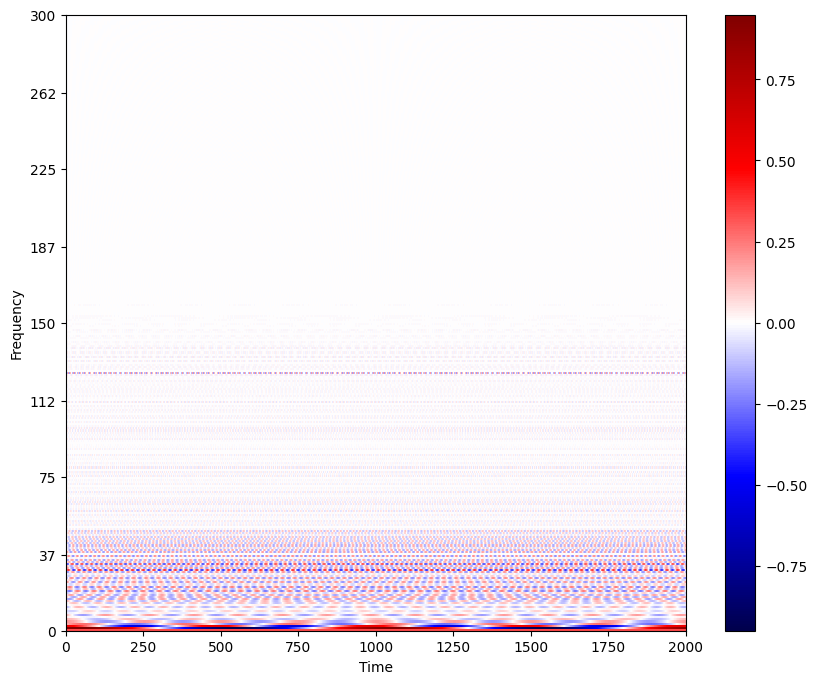

In [75]:
plt.figure(figsize=(10,8))
plt.pcolormesh(channel_1_TF[:,20000:22000],cmap='seismic')
plt.colorbar()
plt.yticks(np.linspace(0,len(N_freq),num=9,dtype='i'),np.linspace(0,len(F_domain),num=9,dtype='i'))
plt.ylabel("Frequency")
plt.xlabel("Time")

In [76]:
channel_2 = sigbufs[1,:]

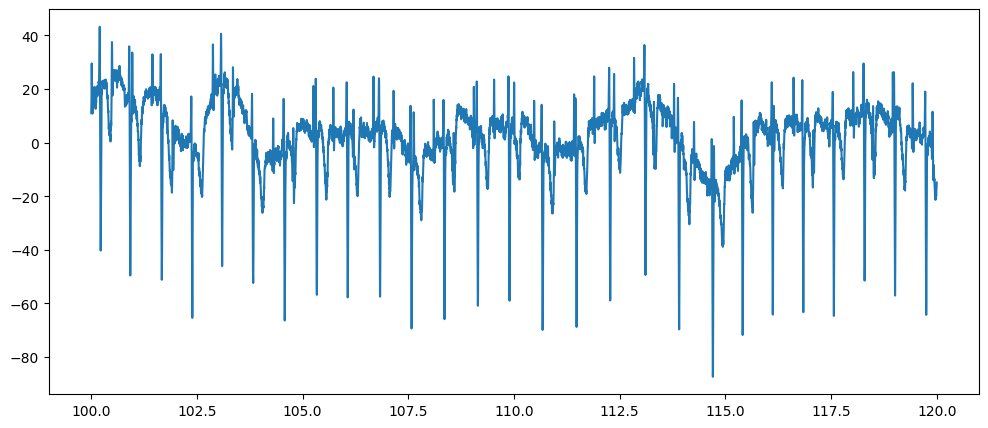

In [77]:
plt.figure(figsize=(12,5))
plt.plot(X[100000:120000], channel_2[100000:120000])
# plt.plot(X, channel_2)

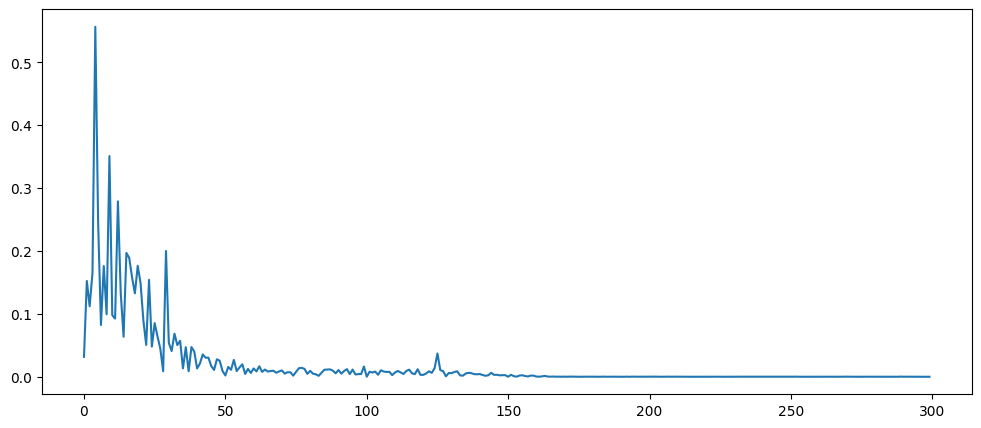

In [78]:
channel_2_spectrum = fourier.fourier_series_spectrum(X, channel_2, N_freq, T/2)

plt.figure(figsize=(12,5))
plt.plot(F_domain, channel_2_spectrum)